In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

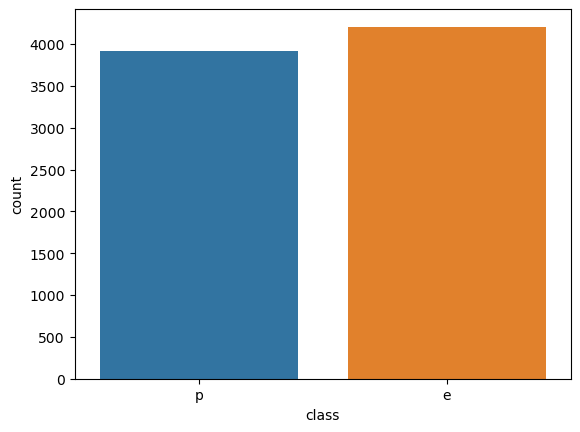

In [4]:
sns.countplot(data = df, x = "class")

In [5]:
Feat_unit = df.describe().transpose().reset_index().sort_values("unique")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'veil-type'),
  Text(1, 0, 'class'),
  Text(2, 0, 'bruises'),
  Text(3, 0, 'gill-attachment'),
  Text(4, 0, 'gill-spacing'),
  Text(5, 0, 'gill-size'),
  Text(6, 0, 'stalk-shape'),
  Text(7, 0, 'ring-number'),
  Text(8, 0, 'cap-surface'),
  Text(9, 0, 'veil-color'),
  Text(10, 0, 'stalk-surface-below-ring'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'stalk-root'),
  Text(14, 0, 'cap-shape'),
  Text(15, 0, 'population'),
  Text(16, 0, 'habitat'),
  Text(17, 0, 'stalk-color-above-ring'),
  Text(18, 0, 'stalk-color-below-ring'),
  Text(19, 0, 'odor'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'cap-color'),
  Text(22, 0, 'gill-color')])

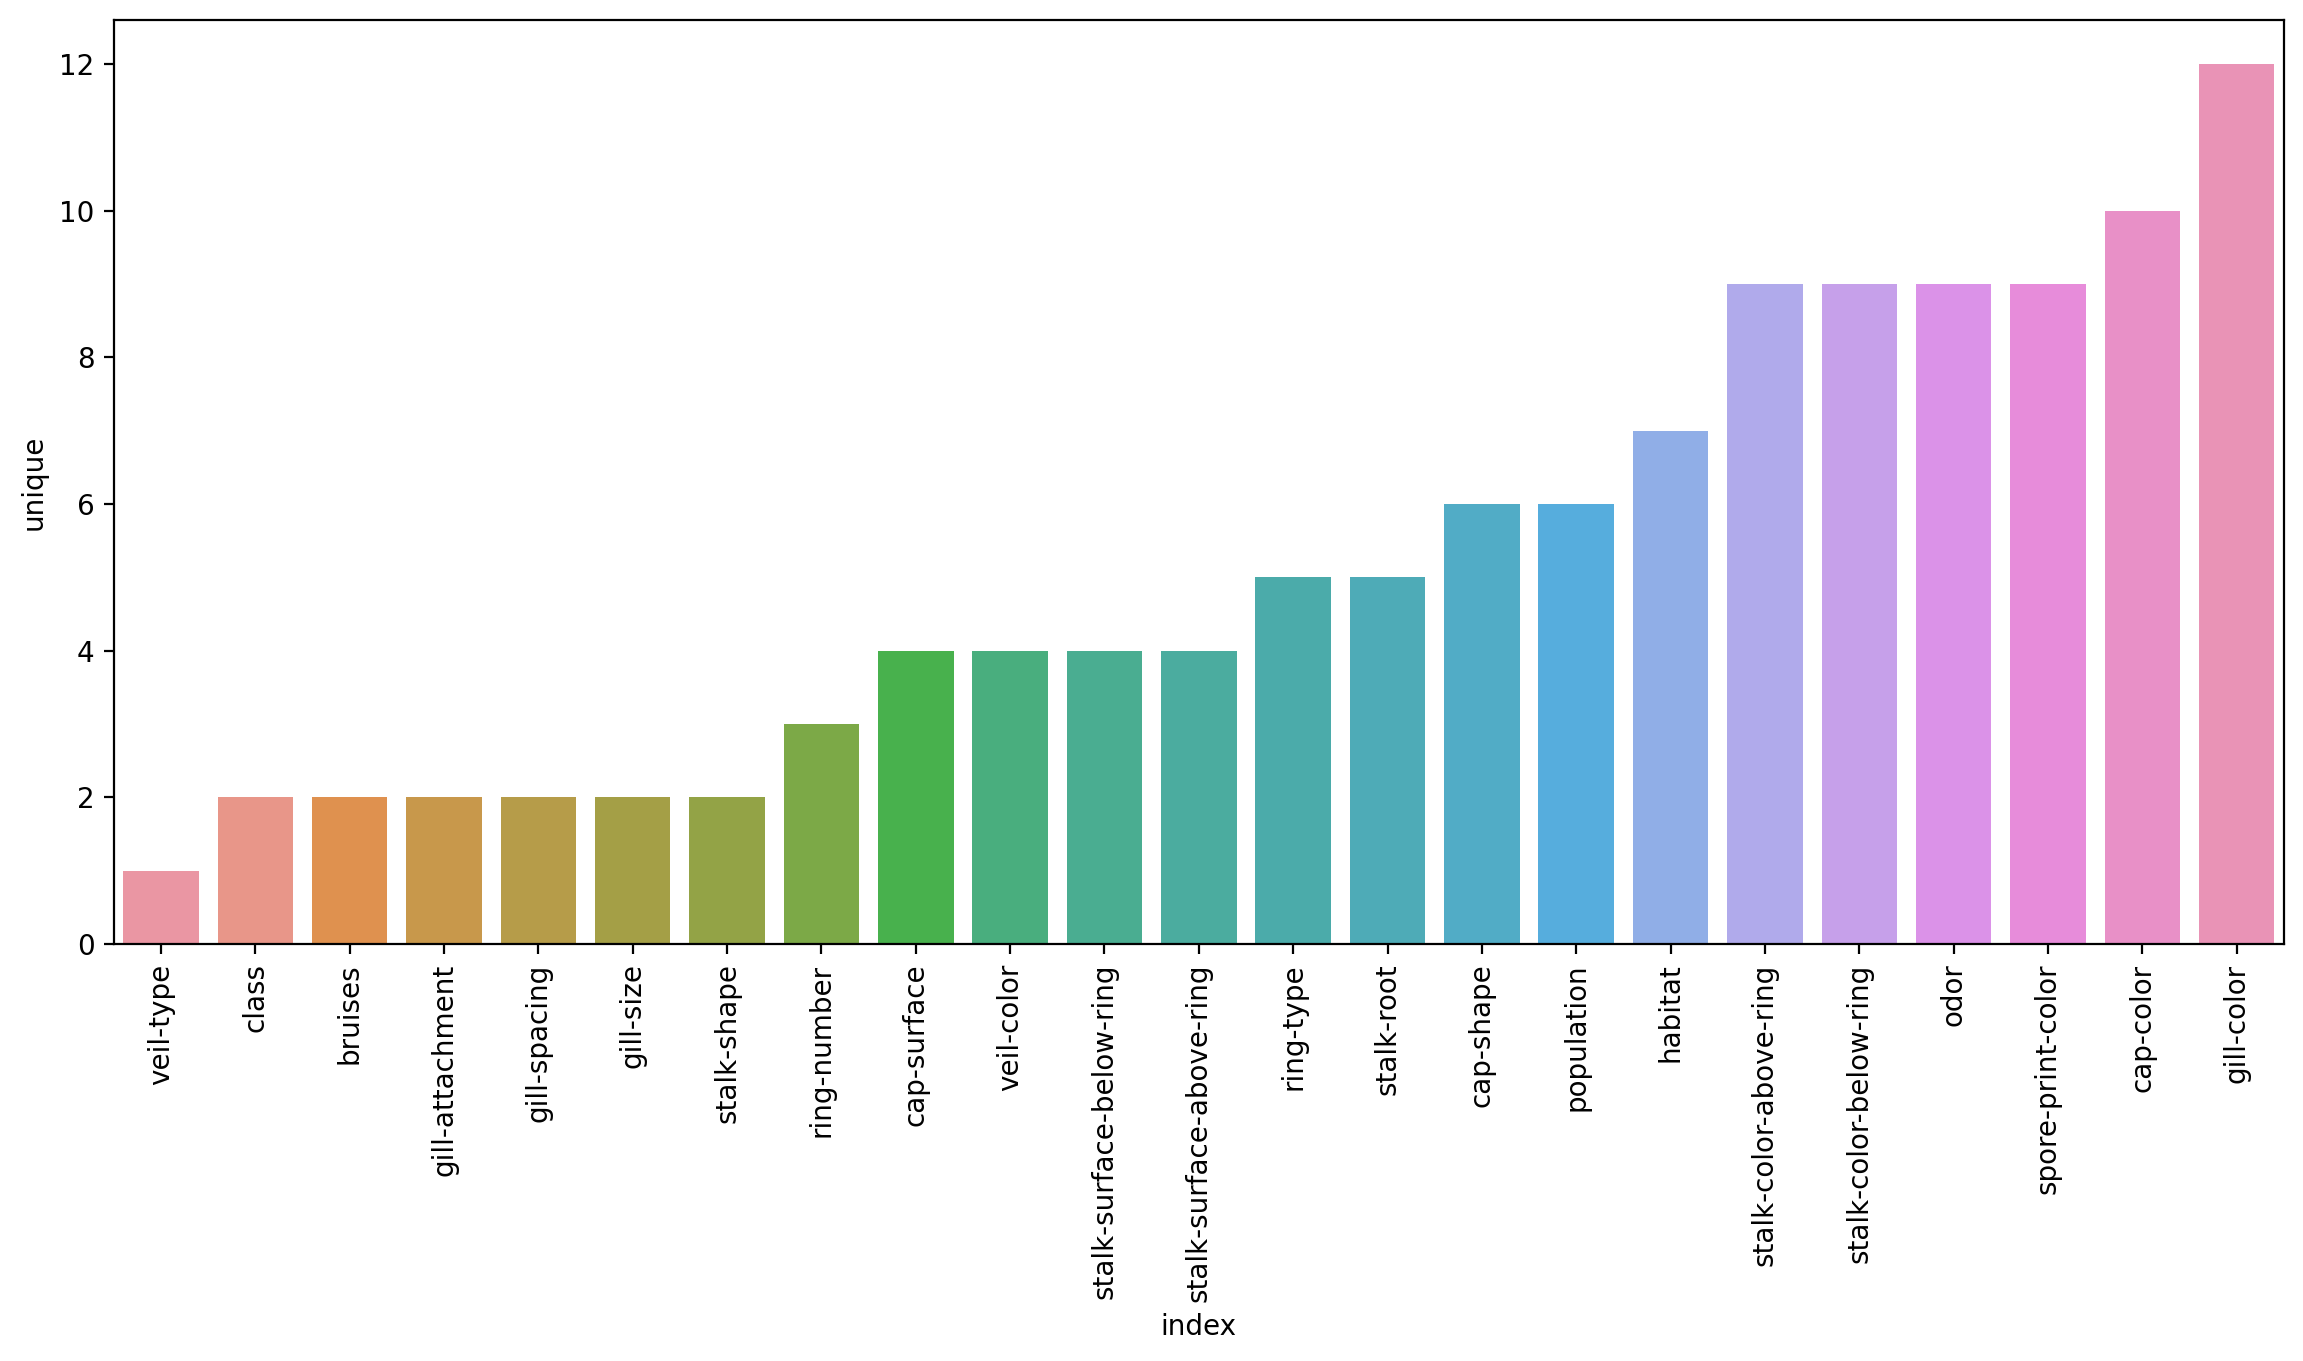

In [6]:
plt.figure(figsize = (14,6), dpi = 200)
sns.barplot(data=Feat_unit, x = "index", y = "unique")
plt.xticks(rotation=90)

In [7]:
X = df.drop("class", axis = 1)
y = df["class"]
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
X = pd.get_dummies(X,drop_first=True)

In [9]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [14]:
ADA = AdaBoostClassifier(n_estimators = 1)

In [15]:
ADA.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [26]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [17]:
pred = ADA.predict(X_test)

In [19]:
pred


array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [21]:
ADA.feature_importances_.argmax()

22

In [24]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

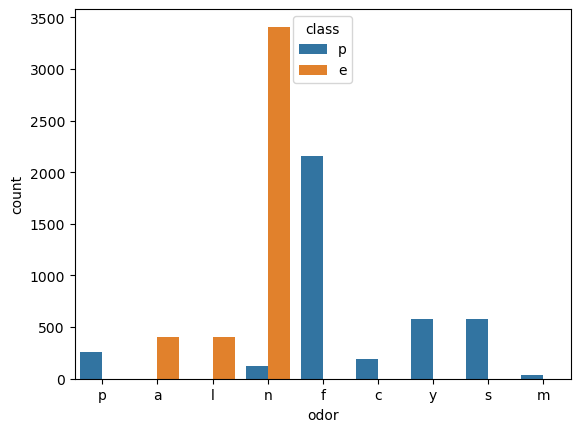

In [25]:
sns.countplot(data=df, x="odor", hue = "class")

In [29]:
error_rates = []


for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    err = 1-accuracy_score(y_test,preds)
    error_rates.append(err)

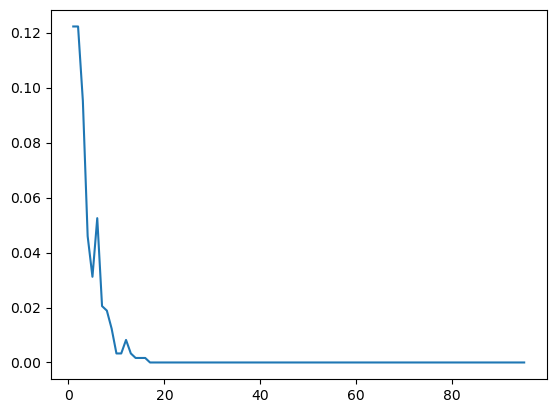

In [30]:
plt.plot(range(1,96), error_rates)

In [31]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [33]:
feats = pd.DataFrame(index = X.columns, data= model.feature_importances_)

In [34]:
feats

,0
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [35]:
model = AdaBoostClassifier(n_estimators=18)

In [36]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=18)

In [38]:
model.predict(X_test)

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [44]:
feats = pd.DataFrame(index = X.columns, data= model.feature_importances_, columns=["Importance"])

In [45]:
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [46]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.05555556, 0.05555556,
       0.        , 0.        , 0.11111111, 0.05555556, 0.        ,
       0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [51]:
imp_feats = feats[feats["Importance"]>0]
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats.sort_values("Importance"), x = imp_feats, y= "Importance")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 2800x1200 with 0 Axes>